# Investigating the failure of convergence of low dimensional neural networks

## 1. Import necessary libraries and define the required classes

In [50]:
%matplotlib notebook

import pandas as pd
import argparse
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import time
import matplotlib
import math
from sklearn import preprocessing
from sklearn.preprocessing import normalize
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import collections
import random
import pickle
torch.set_default_tensor_type('torch.FloatTensor')

In [51]:
#### Multilayer fully connected network with Relu activation.
class LNN(nn.Module):
    def __init__(self,num_feature,num_hidden,nb_layers):
        super(LNN, self, ).__init__()

        fc = []
        for i in range(nb_layers):
            if i == 0:
                fc.append((str(i),nn.Linear(num_feature, num_hidden)))
                fc.append((str(i)+'ReLU',nn.ReLU(inplace=True)))
            elif i == nb_layers-1:
                fc.append((str(i),nn.Linear(num_hidden,1)))
            else:
                fc.append((str(i),nn.Linear(num_hidden, num_hidden)))
                fc.append((str(i)+'ReLU',nn.ReLU(inplace=True)))
        self.linear = nn.Sequential(collections.OrderedDict(fc))
        self.log = nn.Sigmoid()

    def forward(self, x):
#         x = self.log(self.linear(x))
        x = self.linear(x)
        return x

#### Training function: perform one step of accelerated gradient descent (no subsampling)
def train(net,x,y,learning_rate):
    optimizer = optim.SGD(net.parameters(), momentum = 0.9, lr=learning_rate)
    criterion = nn.MSELoss()
    ## zero the parameter gradients
    optimizer.zero_grad()
    ## forward + backward + optimize
    outputs = net(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    ## Print loss
    return loss.item()

## 2. Examples:

### a. Pneumonia age example.

In [ ]:
############# Import Data #############
file = 'medis9847c.data'
df = pd.read_table(file,header = None)
val = df.values
age = val[:,0:1]
y = val[:,-1:]

############# Hyperparameters #############
num_feature = 1
num_epoch = 5000
num_hidden = 5000
num_layer = 2
learning_rate = 1e-4

#################### Experiments #######################

x = age
inputs = torch.from_numpy(x).float()
outputs = torch.from_numpy(y).float()
net = LNN(num_feature, num_hidden,num_layer)
train_loss = [None]*num_epoch
for epoch in range(num_epoch):  # loop over the dataset multiple times
    train_loss[epoch] = train(net,inputs,outputs,learning_rate)
    if epoch % 50 == 49:
        print('Training Iteration:',epoch+1)
        print('Training Loss:',train_loss[epoch])

Training Iteration: 50
Training Loss: 0.11261402815580368
Training Iteration: 100
Training Loss: 0.11228881031274796
Training Iteration: 150
Training Loss: 0.11197514086961746
Training Iteration: 200
Training Loss: 0.11170409619808197
Training Iteration: 250
Training Loss: 0.11137833446264267
Training Iteration: 300
Training Loss: 0.11110784858465195
Training Iteration: 350
Training Loss: 0.11081813275814056
Training Iteration: 400
Training Loss: 0.11055146902799606


<IPython.core.display.Javascript object>


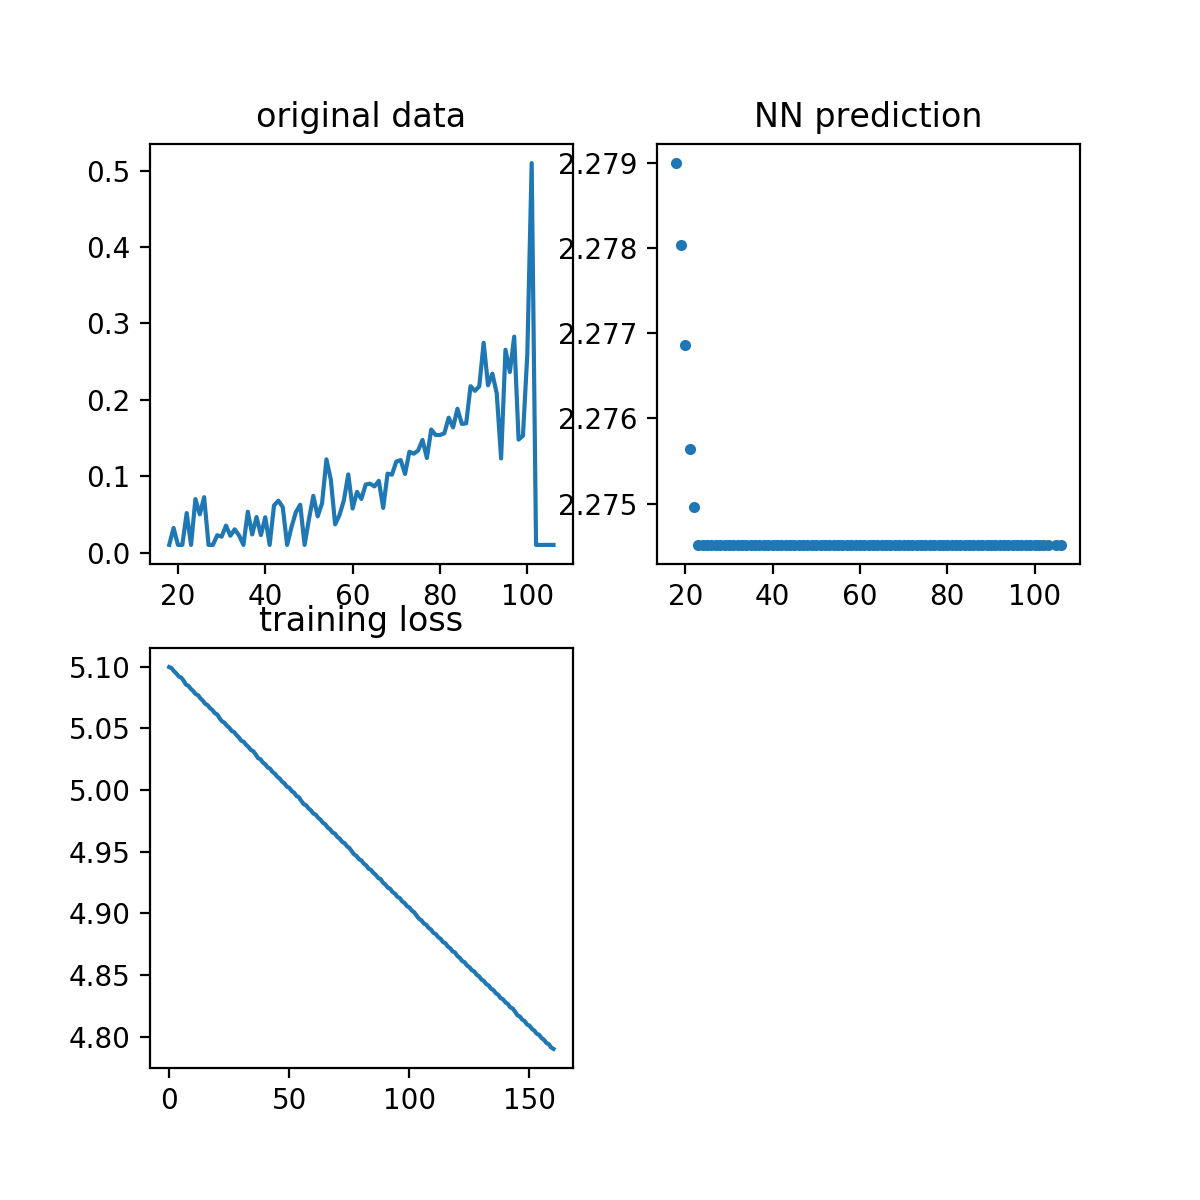

In [47]:
val = df.values
unique_age = np.unique(val[:,0])
h = np.asarray([np.mean(val[np.multiply(val[:,0] >= i-0,val[:,0] <= i+0),-1])+0.01 for i in unique_age])
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
# plt.ylim(ymin=0,ymax=0.5)
plt.title('original data')
plt.plot(unique_age,h)
plt.subplot(2,2,2)
# plt.ylim(ymin=0,ymax=0.5)
plt.title('NN prediction')
plt.plot(unique_age,net(torch.from_numpy(unique_age[...,np.newaxis]).float()).detach().numpy(),'.')
plt.subplot(2,2,3)
plt.title('training loss')
plt.plot(train_loss[50:])
plt.show()

### a. 1-dimensional dataset. Random x and y sampled from standard Gaussian. Squared loss used. 
In this example, the global minimum should achieve zero training error.
It seems that the neural net is trapped in some local minimum and fits a smooth function.

In [226]:
############# Hyperparameters#############
num_feature = 1
num_epoch = 10000000
num_hidden = 500
num_layer = 2
learning_rate = 1e-4
#################### Experiments #######################

x = np.random.randn(20,num_feature)
for i in range(20):
    x[i,0] = 0.1*i-1
y = np.random.rand(20,1)
inputs = torch.from_numpy(x).float()
outputs = torch.from_numpy(y).float()
net = LNN(num_feature, num_hidden,num_layer)
train_loss = []
for epoch in range(num_epoch):  # loop over the dataset multiple times
    train_loss.append(train(net,inputs,outputs,learning_rate))
    if epoch % 5000 == 4999:
        print('Training Iteration:',epoch+1)
        print('Training Loss:',train_loss[-1])

Training Iteration: 5000
Training Loss: 0.09465466439723969
Training Iteration: 10000
Training Loss: 0.09236817061901093
Training Iteration: 15000
Training Loss: 0.09076550602912903
Training Iteration: 20000
Training Loss: 0.08950018882751465
Training Iteration: 25000
Training Loss: 0.08846236765384674
Training Iteration: 30000
Training Loss: 0.08760030567646027
Training Iteration: 35000
Training Loss: 0.08687897771596909
Training Iteration: 40000
Training Loss: 0.0862719789147377
Training Iteration: 45000
Training Loss: 0.0857560783624649
Training Iteration: 50000
Training Loss: 0.0853130966424942
Training Iteration: 55000
Training Loss: 0.08492932468652725
Training Iteration: 60000
Training Loss: 0.08459384739398956
Training Iteration: 65000
Training Loss: 0.0842972844839096
Training Iteration: 70000
Training Loss: 0.08403176814317703
Training Iteration: 75000
Training Loss: 0.08379150182008743
Training Iteration: 80000
Training Loss: 0.08357184380292892
Training Iteration: 85000
Tra

Training Iteration: 670000
Training Loss: 0.07057718932628632
Training Iteration: 675000
Training Loss: 0.0704873651266098
Training Iteration: 680000
Training Loss: 0.07039843499660492
Training Iteration: 685000
Training Loss: 0.07030961662530899
Training Iteration: 690000
Training Loss: 0.07022055983543396
Training Iteration: 695000
Training Loss: 0.07013168185949326
Training Iteration: 700000
Training Loss: 0.07004283368587494
Training Iteration: 705000
Training Loss: 0.06995393335819244
Training Iteration: 710000
Training Loss: 0.06986495852470398
Training Iteration: 715000
Training Loss: 0.06977598369121552
Training Iteration: 720000
Training Loss: 0.06968700885772705
Training Iteration: 725000
Training Loss: 0.0695982500910759
Training Iteration: 730000
Training Loss: 0.06950943917036057
Training Iteration: 735000
Training Loss: 0.0694206953048706
Training Iteration: 740000
Training Loss: 0.06933203339576721
Training Iteration: 745000
Training Loss: 0.06924329698085785
Training It

Training Iteration: 1330000
Training Loss: 0.06034030765295029
Training Iteration: 1335000
Training Loss: 0.06027650088071823
Training Iteration: 1340000
Training Loss: 0.060212861746549606
Training Iteration: 1345000
Training Loss: 0.06014944985508919
Training Iteration: 1350000
Training Loss: 0.0600862018764019
Training Iteration: 1355000
Training Loss: 0.06002303212881088
Training Iteration: 1360000
Training Loss: 0.05995989963412285
Training Iteration: 1365000
Training Loss: 0.059896908700466156
Training Iteration: 1370000
Training Loss: 0.05983393266797066
Training Iteration: 1375000
Training Loss: 0.0597711019217968
Training Iteration: 1380000
Training Loss: 0.05970834568142891
Training Iteration: 1385000
Training Loss: 0.059645719826221466
Training Iteration: 1390000
Training Loss: 0.05958304926753044
Training Iteration: 1395000
Training Loss: 0.0595204159617424
Training Iteration: 1400000
Training Loss: 0.059457890689373016
Training Iteration: 1405000
Training Loss: 0.059395469

Training Iteration: 1980000
Training Loss: 0.052744705229997635
Training Iteration: 1985000
Training Loss: 0.052692584693431854
Training Iteration: 1990000
Training Loss: 0.05264047533273697
Training Iteration: 1995000
Training Loss: 0.05258844420313835
Training Iteration: 2000000
Training Loss: 0.05253640562295914
Training Iteration: 2005000
Training Loss: 0.05248464271426201
Training Iteration: 2010000
Training Loss: 0.05243305116891861
Training Iteration: 2015000
Training Loss: 0.05238133668899536
Training Iteration: 2020000
Training Loss: 0.05232974886894226
Training Iteration: 2025000
Training Loss: 0.05227820947766304
Training Iteration: 2030000
Training Loss: 0.05222669988870621
Training Iteration: 2035000
Training Loss: 0.05217520147562027
Training Iteration: 2040000
Training Loss: 0.05212367698550224
Training Iteration: 2045000
Training Loss: 0.052072446793317795
Training Iteration: 2050000
Training Loss: 0.052021801471710205
Training Iteration: 2055000
Training Loss: 0.051971

Training Iteration: 2630000
Training Loss: 0.046598538756370544
Training Iteration: 2635000
Training Loss: 0.046554796397686005
Training Iteration: 2640000
Training Loss: 0.04651102423667908
Training Iteration: 2645000
Training Loss: 0.04646734520792961
Training Iteration: 2650000
Training Loss: 0.046423692256212234
Training Iteration: 2655000
Training Loss: 0.046380095183849335
Training Iteration: 2660000
Training Loss: 0.04633674770593643
Training Iteration: 2665000
Training Loss: 0.04629359766840935
Training Iteration: 2670000
Training Loss: 0.04625045880675316
Training Iteration: 2675000
Training Loss: 0.04620734974741936
Training Iteration: 2680000
Training Loss: 0.04616429656744003
Training Iteration: 2685000
Training Loss: 0.04612132906913757
Training Iteration: 2690000
Training Loss: 0.04607831686735153
Training Iteration: 2695000
Training Loss: 0.04603532701730728
Training Iteration: 2700000
Training Loss: 0.0459924153983593
Training Iteration: 2705000
Training Loss: 0.0459493

Training Iteration: 3280000
Training Loss: 0.04125899821519852
Training Iteration: 3285000
Training Loss: 0.0412210077047348
Training Iteration: 3290000
Training Loss: 0.041183024644851685
Training Iteration: 3295000
Training Loss: 0.04114510864019394
Training Iteration: 3300000
Training Loss: 0.041107237339019775
Training Iteration: 3305000
Training Loss: 0.04106941074132919
Training Iteration: 3310000
Training Loss: 0.04103162884712219
Training Iteration: 3315000
Training Loss: 0.040993861854076385
Training Iteration: 3320000
Training Loss: 0.040956173092126846
Training Iteration: 3325000
Training Loss: 0.04091846942901611
Training Iteration: 3330000
Training Loss: 0.040880974382162094
Training Iteration: 3335000
Training Loss: 0.04084352031350136
Training Iteration: 3340000
Training Loss: 0.040806014090776443
Training Iteration: 3345000
Training Loss: 0.04076856002211571
Training Iteration: 3350000
Training Loss: 0.04073111340403557
Training Iteration: 3355000
Training Loss: 0.04069

Training Iteration: 3930000
Training Loss: 0.0365891270339489
Training Iteration: 3935000
Training Loss: 0.03655528277158737
Training Iteration: 3940000
Training Loss: 0.036521412432193756
Training Iteration: 3945000
Training Loss: 0.036487605422735214
Training Iteration: 3950000
Training Loss: 0.036453865468502045
Training Iteration: 3955000
Training Loss: 0.03642003983259201
Training Iteration: 3960000
Training Loss: 0.036386262625455856
Training Iteration: 3965000
Training Loss: 0.03635236620903015
Training Iteration: 3970000
Training Loss: 0.036318447440862656
Training Iteration: 3975000
Training Loss: 0.03628461807966232
Training Iteration: 3980000
Training Loss: 0.036250870674848557
Training Iteration: 3985000
Training Loss: 0.03621719032526016
Training Iteration: 3990000
Training Loss: 0.036183491349220276
Training Iteration: 3995000
Training Loss: 0.036149896681308746
Training Iteration: 4000000
Training Loss: 0.03611624240875244
Training Iteration: 4005000
Training Loss: 0.036

Training Iteration: 4580000
Training Loss: 0.03240662440657616
Training Iteration: 4585000
Training Loss: 0.03237638995051384
Training Iteration: 4590000
Training Loss: 0.032346177846193314
Training Iteration: 4595000
Training Loss: 0.032315973192453384
Training Iteration: 4600000
Training Loss: 0.03228582441806793
Training Iteration: 4605000
Training Loss: 0.03225567191839218
Training Iteration: 4610000
Training Loss: 0.03222544491291046
Training Iteration: 4615000
Training Loss: 0.032195329666137695
Training Iteration: 4620000
Training Loss: 0.032165225595235825
Training Iteration: 4625000
Training Loss: 0.03213512524962425
Training Iteration: 4630000
Training Loss: 0.03210509568452835
Training Iteration: 4635000
Training Loss: 0.032075099647045135
Training Iteration: 4640000
Training Loss: 0.032045163214206696
Training Iteration: 4645000
Training Loss: 0.032015230506658554
Training Iteration: 4650000
Training Loss: 0.03198539838194847
Training Iteration: 4655000
Training Loss: 0.031

Training Iteration: 5225000
Training Loss: 0.02878854237496853
Training Iteration: 5230000
Training Loss: 0.02876242995262146
Training Iteration: 5235000
Training Loss: 0.02873634360730648
Training Iteration: 5240000
Training Loss: 0.028710272163152695
Training Iteration: 5245000
Training Loss: 0.02868426963686943
Training Iteration: 5250000
Training Loss: 0.02865818701684475
Training Iteration: 5255000
Training Loss: 0.028632134199142456
Training Iteration: 5260000
Training Loss: 0.028606200590729713
Training Iteration: 5265000
Training Loss: 0.028580153360962868
Training Iteration: 5270000
Training Loss: 0.02855423092842102
Training Iteration: 5275000
Training Loss: 0.028528312221169472
Training Iteration: 5280000
Training Loss: 0.02850233018398285
Training Iteration: 5285000
Training Loss: 0.02847636118531227
Training Iteration: 5290000
Training Loss: 0.028450440615415573
Training Iteration: 5295000
Training Loss: 0.028424570336937904
Training Iteration: 5300000
Training Loss: 0.028

Training Iteration: 5870000
Training Loss: 0.025646096095442772
Training Iteration: 5875000
Training Loss: 0.02562309242784977
Training Iteration: 5880000
Training Loss: 0.025600120425224304
Training Iteration: 5885000
Training Loss: 0.025577176362276077
Training Iteration: 5890000
Training Loss: 0.025554234161973
Training Iteration: 5895000
Training Loss: 0.025531331077218056
Training Iteration: 5900000
Training Loss: 0.02550840750336647
Training Iteration: 5905000
Training Loss: 0.02548549696803093
Training Iteration: 5910000
Training Loss: 0.02546265721321106
Training Iteration: 5915000
Training Loss: 0.025439748540520668
Training Iteration: 5920000
Training Loss: 0.02541687712073326
Training Iteration: 5925000
Training Loss: 0.02539404295384884
Training Iteration: 5930000
Training Loss: 0.025371257215738297
Training Iteration: 5935000
Training Loss: 0.025348439812660217
Training Iteration: 5940000
Training Loss: 0.025325704365968704
Training Iteration: 5945000
Training Loss: 0.0253

Training Iteration: 6515000
Training Loss: 0.022861670702695847
Training Iteration: 6520000
Training Loss: 0.022841352969408035
Training Iteration: 6525000
Training Loss: 0.02282108925282955
Training Iteration: 6530000
Training Loss: 0.022800877690315247
Training Iteration: 6535000
Training Loss: 0.02278074435889721
Training Iteration: 6540000
Training Loss: 0.02276059053838253
Training Iteration: 6545000
Training Loss: 0.022740477696061134
Training Iteration: 6550000
Training Loss: 0.02272038906812668
Training Iteration: 6555000
Training Loss: 0.02270038053393364
Training Iteration: 6560000
Training Loss: 0.02268037013709545
Training Iteration: 6565000
Training Loss: 0.02266041189432144
Training Iteration: 6570000
Training Loss: 0.022640397772192955
Training Iteration: 6575000
Training Loss: 0.022620372474193573
Training Iteration: 6580000
Training Loss: 0.022600380703806877
Training Iteration: 6585000
Training Loss: 0.02258041501045227
Training Iteration: 6590000
Training Loss: 0.022

Training Iteration: 7160000
Training Loss: 0.02041149139404297
Training Iteration: 7165000
Training Loss: 0.020393405109643936
Training Iteration: 7170000
Training Loss: 0.020375311374664307
Training Iteration: 7175000
Training Loss: 0.020357325673103333
Training Iteration: 7180000
Training Loss: 0.020339222624897957
Training Iteration: 7185000
Training Loss: 0.02032119780778885
Training Iteration: 7190000
Training Loss: 0.020303156226873398
Training Iteration: 7195000
Training Loss: 0.020285097882151604
Training Iteration: 7200000
Training Loss: 0.020267076790332794
Training Iteration: 7205000
Training Loss: 0.02024909108877182
Training Iteration: 7210000
Training Loss: 0.020231138914823532
Training Iteration: 7215000
Training Loss: 0.020213160663843155
Training Iteration: 7220000
Training Loss: 0.02019517309963703
Training Iteration: 7225000
Training Loss: 0.020177271217107773
Training Iteration: 7230000
Training Loss: 0.020159367471933365
Training Iteration: 7235000
Training Loss: 0

Training Iteration: 7805000
Training Loss: 0.018177110701799393
Training Iteration: 7810000
Training Loss: 0.018160806968808174
Training Iteration: 7815000
Training Loss: 0.01814456656575203
Training Iteration: 7820000
Training Loss: 0.01812831684947014
Training Iteration: 7825000
Training Loss: 0.01811208762228489
Training Iteration: 7830000
Training Loss: 0.01809585653245449
Training Iteration: 7835000
Training Loss: 0.018079694360494614
Training Iteration: 7840000
Training Loss: 0.01806345395743847
Training Iteration: 7845000
Training Loss: 0.018047267571091652
Training Iteration: 7850000
Training Loss: 0.01803106628358364
Training Iteration: 7855000
Training Loss: 0.018014809116721153
Training Iteration: 7860000
Training Loss: 0.017998691648244858
Training Iteration: 7865000
Training Loss: 0.01798255555331707
Training Iteration: 7870000
Training Loss: 0.017966412007808685
Training Iteration: 7875000
Training Loss: 0.017950240522623062
Training Iteration: 7880000
Training Loss: 0.01

Training Iteration: 8450000
Training Loss: 0.016187315806746483
Training Iteration: 8455000
Training Loss: 0.016172977164387703
Training Iteration: 8460000
Training Loss: 0.016158711165189743
Training Iteration: 8465000
Training Loss: 0.016144458204507828
Training Iteration: 8470000
Training Loss: 0.016130216419696808
Training Iteration: 8475000
Training Loss: 0.016115982085466385
Training Iteration: 8480000
Training Loss: 0.016101796180009842
Training Iteration: 8485000
Training Loss: 0.01608758047223091
Training Iteration: 8490000
Training Loss: 0.016073327511548996
Training Iteration: 8495000
Training Loss: 0.01605917140841484
Training Iteration: 8500000
Training Loss: 0.016044981777668
Training Iteration: 8505000
Training Loss: 0.016030769795179367
Training Iteration: 8510000
Training Loss: 0.01601659506559372
Training Iteration: 8515000
Training Loss: 0.01600249856710434
Training Iteration: 8520000
Training Loss: 0.01598832570016384
Training Iteration: 8525000
Training Loss: 0.015

Training Iteration: 9095000
Training Loss: 0.014471608214080334
Training Iteration: 9100000
Training Loss: 0.01445947028696537
Training Iteration: 9105000
Training Loss: 0.014447416178882122
Training Iteration: 9110000
Training Loss: 0.014435355551540852
Training Iteration: 9115000
Training Loss: 0.014423293992877007
Training Iteration: 9120000
Training Loss: 0.014411267824470997
Training Iteration: 9125000
Training Loss: 0.014399257488548756
Training Iteration: 9130000
Training Loss: 0.014387247152626514
Training Iteration: 9135000
Training Loss: 0.014375271275639534
Training Iteration: 9140000
Training Loss: 0.014363251626491547
Training Iteration: 9145000
Training Loss: 0.014351238496601582
Training Iteration: 9150000
Training Loss: 0.014339273795485497
Training Iteration: 9155000
Training Loss: 0.0143272178247571
Training Iteration: 9160000
Training Loss: 0.014315198175609112
Training Iteration: 9165000
Training Loss: 0.01430318970233202
Training Iteration: 9170000
Training Loss: 0

Training Iteration: 9740000
Training Loss: 0.013067526742815971
Training Iteration: 9745000
Training Loss: 0.013057636097073555
Training Iteration: 9750000
Training Loss: 0.0130477799102664
Training Iteration: 9755000
Training Loss: 0.01303785014897585
Training Iteration: 9760000
Training Loss: 0.013027934357523918
Training Iteration: 9765000
Training Loss: 0.013018074445426464
Training Iteration: 9770000
Training Loss: 0.013008182868361473
Training Iteration: 9775000
Training Loss: 0.012998320162296295
Training Iteration: 9780000
Training Loss: 0.012988485395908356
Training Iteration: 9785000
Training Loss: 0.012978652492165565
Training Iteration: 9790000
Training Loss: 0.012968731112778187
Training Iteration: 9795000
Training Loss: 0.012958861887454987
Training Iteration: 9800000
Training Loss: 0.012948969379067421
Training Iteration: 9805000
Training Loss: 0.012939078733325005
Training Iteration: 9810000
Training Loss: 0.012929201126098633
Training Iteration: 9815000
Training Loss: 

<IPython.core.display.Javascript object>


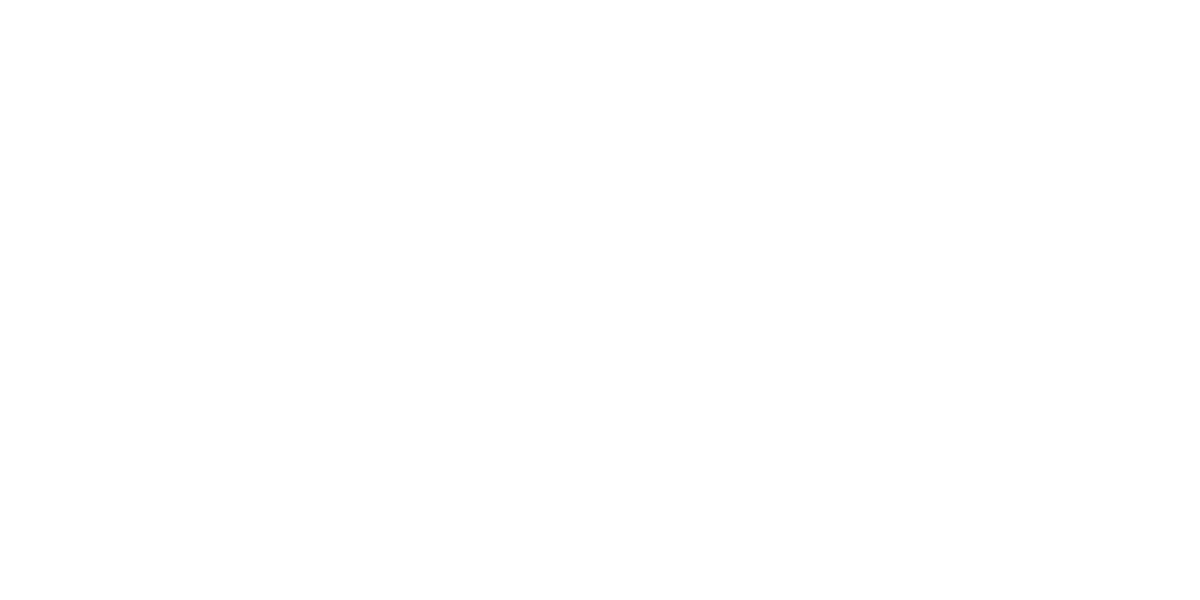

NameError: name 'x' is not defined

In [3]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plt.title('label vs. prediction')
plt.plot(x,y,'o',label = 'label')
plt.plot(x,net(inputs).detach().numpy(),'x',label = 'prediction')
plt.legend()
plt.subplot(1,2,2)
plt.title('training loss')
plt.plot(train_loss)
plt.ylim(ymin=0)
plt.show()

### b. 1-dimensional dataset. Random x sampled from standard Gaussian. y set as simple function of x. Squared loss used.

Training Iteration: 500
Training Loss: 0.034419383853673935
Training Iteration: 1000
Training Loss: 0.03139811381697655
Training Iteration: 1500
Training Loss: 0.031089365482330322
Training Iteration: 2000
Training Loss: 0.030896509066224098
Training Iteration: 2500
Training Loss: 0.030735060572624207
Training Iteration: 3000
Training Loss: 0.030575141310691833
Training Iteration: 3500
Training Loss: 0.030443081632256508
Training Iteration: 4000
Training Loss: 0.030318036675453186
Training Iteration: 4500
Training Loss: 0.03019276261329651
Training Iteration: 5000
Training Loss: 0.030077582225203514
Training Iteration: 5500
Training Loss: 0.029969405382871628
Training Iteration: 6000
Training Loss: 0.029867801815271378
Training Iteration: 6500
Training Loss: 0.0297721978276968
Training Iteration: 7000
Training Loss: 0.02967945858836174
Training Iteration: 7500
Training Loss: 0.029589971527457237
Training Iteration: 8000
Training Loss: 0.02950250171124935
Training Iteration: 8500
Traini

<IPython.core.display.Javascript object>


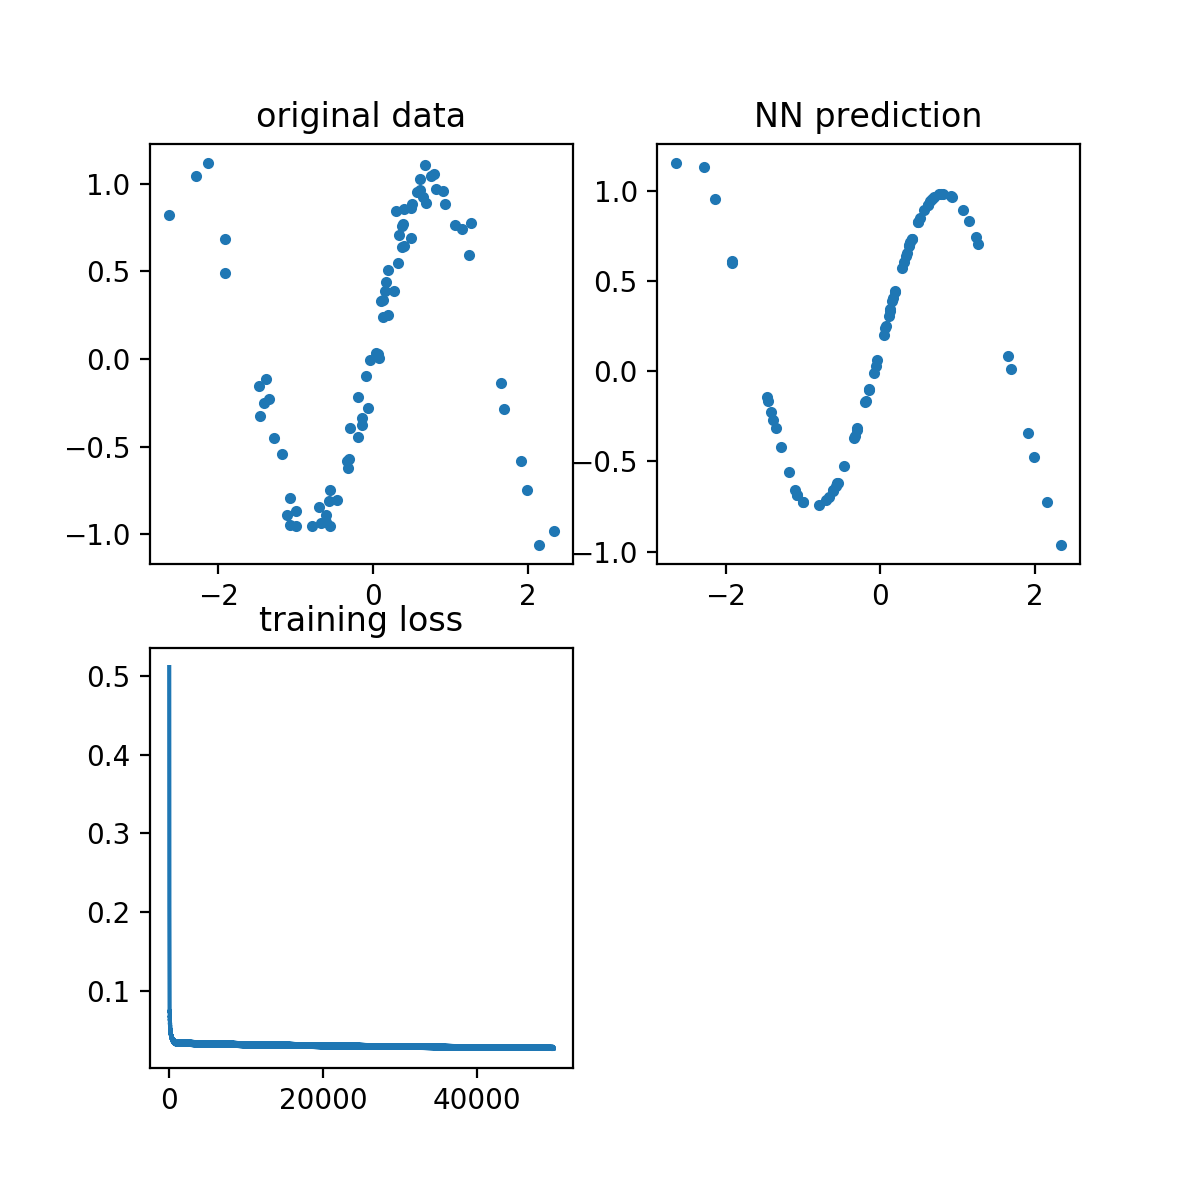

In [171]:
############# Hyperparameters#############
num_feature = 1
num_epoch = 50000
num_hidden = 5000
num_layer = 2
learning_rate = 1e-4
#################### Experiments #######################

x = np.random.randn(80,num_feature)
y = np.sin(2*x)+1/10*np.random.randn(80,num_feature)
inputs = torch.from_numpy(x).float()
outputs = torch.from_numpy(y).float()
net = LNN(num_feature, num_hidden,num_layer)
train_loss = []
for epoch in range(num_epoch):  # loop over the dataset multiple times
    train_loss.append(train(net,inputs,outputs,learning_rate))
    if epoch % 500 == 499:
        print('Training Iteration:',epoch+1)
        print('Training Loss:',train_loss[-1])
        
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
plt.title('original data')
plt.plot(x,y,'.')
plt.subplot(2,2,2)
plt.title('NN prediction')
plt.plot(x,net(inputs).detach().numpy(),'.')
plt.subplot(2,2,3)
plt.title('training loss')
plt.plot(train_loss)
plt.show()

### c. 2-dimensional dataset. Random x and y sampled from standard Gaussian. Squared loss used.

In [179]:
############# Hyperparameters#############
num_feature = 4
num_epoch = 3000
num_hidden = 5000
num_layer = 2
batch_size = 2000
learning_rate = 1e-4
#################### Experiments #######################

x = np.random.randn(80,num_feature)
x = normalize(x, axis=1, norm='l2')
y = np.random.randn(80,1)
inputs = torch.from_numpy(x).float()
outputs = torch.from_numpy(y).float()
net = LNN(num_feature, num_hidden,num_layer)
train_loss = []
for epoch in range(num_epoch):  # loop over the dataset multiple times
    train_loss.append(train(net,inputs,outputs,learning_rate))
    if epoch % 500 == 499:
        print('Training Iteration:',epoch+1)
        print('Training Loss:',train_loss[-1])

Training Iteration: 500
Training Loss: 0.48309850692749023
Training Iteration: 1000
Training Loss: 0.30672743916511536
Training Iteration: 1500
Training Loss: 0.21925969421863556
Training Iteration: 2000
Training Loss: 0.1772572100162506
Training Iteration: 2500
Training Loss: 0.15372858941555023
Training Iteration: 3000
Training Loss: 0.13807226717472076


<IPython.core.display.Javascript object>


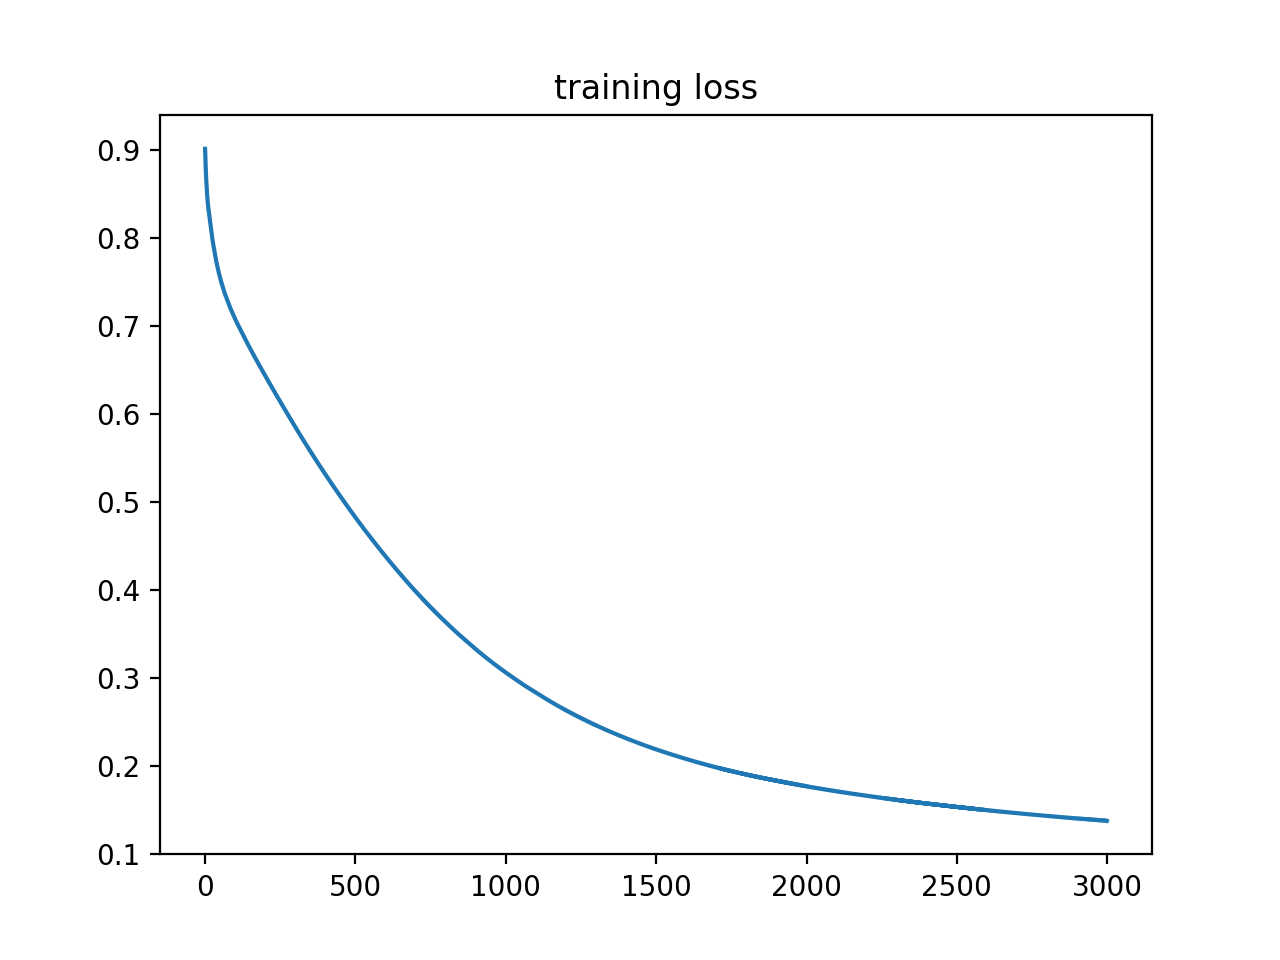

In [180]:
plt.figure()
plt.title('training loss')
plt.plot(train_loss)
plt.show()